In [1]:
import pandas as pd
df = pd.read_csv('house.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
house_data = df.drop(['id','date'],axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis = 1)
target_data = house_data['price']

# train : test set = 8 : 2
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, 
                                                    test_size = 0.2)

print('모든 데이터', train_data.shape)
print('train set', x_train.shape, y_train.shape)
print('test set', x_test.shape, y_test.shape)


모든 데이터 (21613, 18)
train set (17290, 18) (17290,)
test set (4323, 18) (4323,)


In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

print('train set score',lr.score(x_train, y_train))
print('test set score',lr.score(x_test, y_test))
# 정답이 있는게 아니라 연속적인 문제이기 때문에 스코어링이 피어슨 상관계수에 기인해서 점수화된다. 
result1 = lr.score(x_test, y_test)

train set score 0.6997934989942441
test set score 0.6991739796041527


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model2 = make_pipeline(PolynomialFeatures(2),
                      LinearRegression())
model2.fit(x_train, y_train)

print('train set score',model2.score(x_train, y_train))
print('test set score',model2.score(x_test, y_test))
result2 = model2.score(x_test, y_test)

train set score 0.8276113713175866
test set score 0.8281688843209174


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model3 = make_pipeline(PolynomialFeatures(3),
                      LinearRegression())
model3.fit(x_train, y_train)

print('train set score',model3.score(x_train, y_train))
print('test set score',model3.score(x_test, y_test))
result3 = model3.score(x_test, y_test)

train set score 0.8737027501845633
test set score -0.35182464303122174


In [20]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train,y_train)

print("train set score", tree.score(x_train, y_train))
print("test set score", tree.score(x_test, y_test))
result4 = tree.score(x_test, y_test)

train set score 0.9993291941013128
test set score 0.7559087187573335


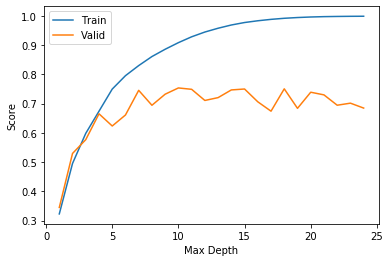

In [21]:
import matplotlib.pyplot as plt
train_score = []
depth_range = range(1,25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth=depth).fit(x_train,y_train)
    
    train_score.append(tree.score(x_train, y_train))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()

    

In [23]:
print(result1)
print(result2)
print(result4)



0.6991739796041527
0.8281688843209174
0.7559087187573335
